# Analyses of multiple large populations

In [1]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [2]:
%%time
with gzip.open('./saved_simulations/large-neutral-100_MultiSim.pkl.gz', 'rb') as f:
    neutral = pickle.load(f) 

CPU times: user 9.32 s, sys: 2.38 s, total: 11.7 s
Wall time: 11.8 s


In [3]:
%%time
with gzip.open('./saved_simulations/large-selection-100_MultiSim.pkl.gz', 'rb') as f:
    selection = pickle.load(f) 

CPU times: user 10.8 s, sys: 3.77 s, total: 14.5 s
Wall time: 15.2 s


## Maximum allele frequencies

In [4]:
neutral_MaxAFs = get_max_AFs(neutral, det_lim=100)
selection_MaxAFs = get_max_AFs(selection, det_lim=100)

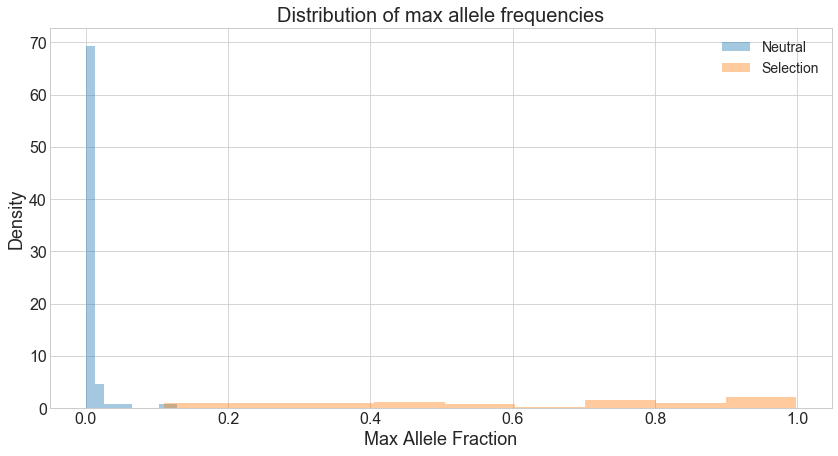

In [5]:
sns.distplot(neutral_MaxAFs, bins=10, norm_hist=True, kde=False, label="Neutral");
sns.distplot(selection_MaxAFs, bins=10, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-100_sim/Large-MaxAFs.png')
plt.show()

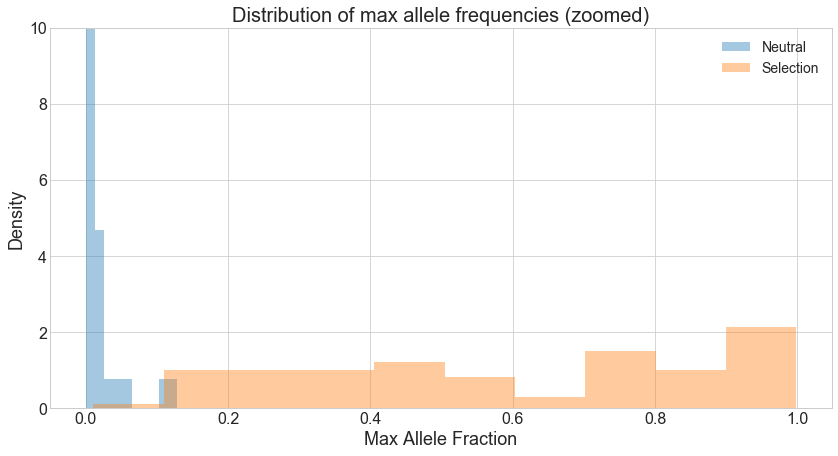

In [6]:
sns.distplot(neutral_MaxAFs, bins=10, norm_hist=True, kde=False, label="Neutral");
sns.distplot(selection_MaxAFs, bins=10, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution of max allele frequencies (zoomed)');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
plt.ylim(0, 10);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-100_sim/Large-MaxAFs_zoomed.png')
plt.show()

## Heterogeneity

In [7]:
neutral_H = get_heterogeneity(neutral, det_lim=100)
selection_H = get_heterogeneity(selection, det_lim=100)

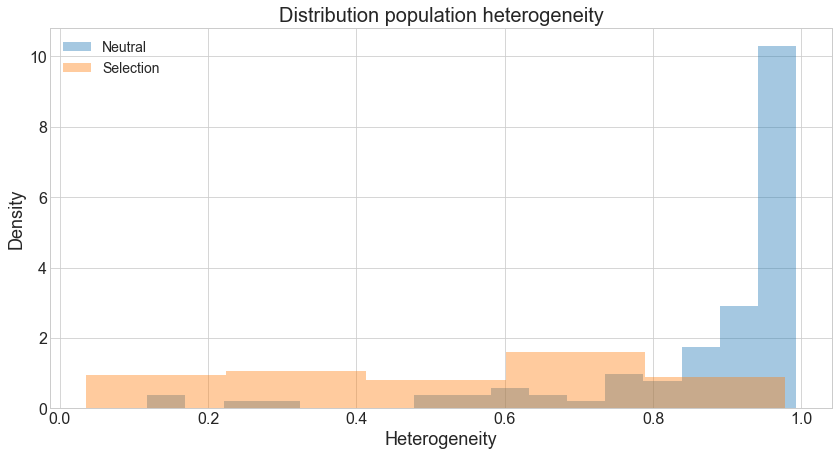

In [8]:
sns.distplot(neutral_H, norm_hist=True, kde=False, label="Neutral");
sns.distplot(selection_H, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/MultiSim-Large-100_sim/Large-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [9]:
neutral_mut_distr = get_mutation_distributions(neutral, det_lim=100)
selection_mut_distr = get_mutation_distributions(selection, det_lim=100)

In [10]:
neutral_mut_distr.to_csv('./simulation_data/Large-100_sim-neutral_mut_distr.csv')
selection_mut_distr.to_csv('./simulation_data/Large-100_sim-selection_mut_distr.csv')

In [11]:
neutral_avg_nmd = neutral_mut_distr.mean()
neutral_std_nmd = neutral_mut_distr.std()
selection_avg_nmd = selection_mut_distr.mean()
selection_std_nmd = selection_mut_distr.std()

In [12]:
neutral_avg_num_mut = avg_num_mutations(neutral_avg_nmd)
selection_avg_num_mut = avg_num_mutations(selection_avg_nmd)

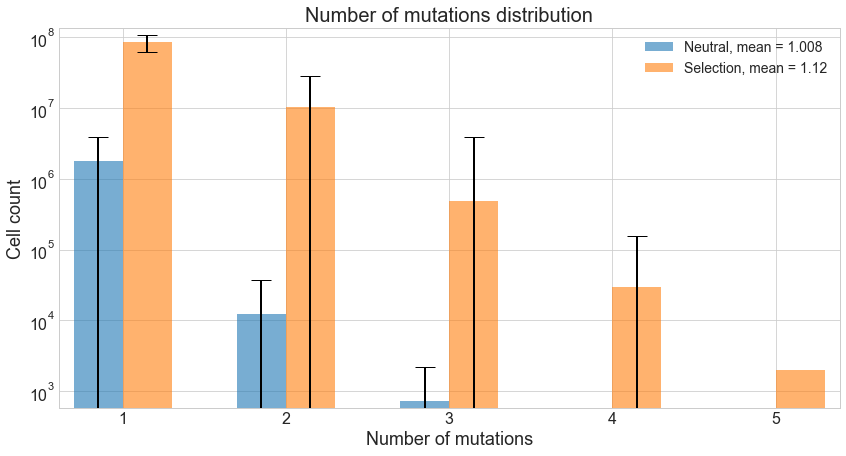

In [13]:
neutral_errors = neutral_std_nmd.values
selection_errors = selection_std_nmd.values

plt.bar(left=neutral_avg_nmd.index-0.15, height=neutral_avg_nmd.values, width=0.3, alpha=0.6, align='center', 
        yerr=neutral_errors, capsize=10,
        label="Neutral, mean = %s" %(round(neutral_avg_num_mut, 3)));

plt.bar(left=selection_avg_nmd.index+0.15, height=selection_avg_nmd.values, width=0.3, alpha=0.6, align='center',
        yerr=selection_errors, capsize=10, 
        label="Selection, mean = %s" %(round(selection_avg_num_mut, 3)));

plt.title("Number of mutations distribution");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-100_sim/Large-Num_mutations.png')
plt.show()

## Total number of mutations

In [14]:
neutral_total_m = get_total_mutations(neutral, det_lim=1)
selection_total_m = get_total_mutations(selection, det_lim=1)

In [1]:
sns.violinplot(data=[neutral_total_m, selection_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0, 1], ["Neutral", "Selection"]);
plt.savefig('./Figures/MultiSim-Large-100_sim/Large-Total_num_mutations.png')
plt.show()

NameError: name 'sns' is not defined

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [16]:
alpha = 0.3

In [17]:
neutral_rec_errors = get_reconstruction_errors(neutral, alpha, det_lim=100)
selection_rec_errors = get_reconstruction_errors(selection, alpha, det_lim=100)

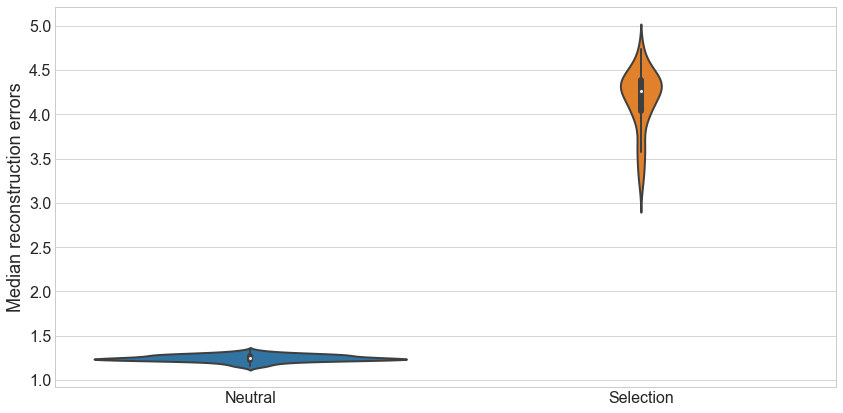

In [18]:
sns.violinplot(data=[neutral_rec_errors, selection_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0, 1], ["Neutral", "Selection"]);
plt.savefig('./Figures/MultiSim-Large-100_sim/Large-Num_mutations.png')
plt.show()

## Export data

In [21]:
%%time
d = pd.DataFrame()
d["neutral_MaxAFs"] = neutral_MaxAFs
d["selection_MaxAFs"] = selection_MaxAFs
d["neutral_H"] = neutral_H
d["selection_H"] = selection_H
d["neutral_total_m"] = neutral_total_m
d["selection_total_m"] = selection_total_m
d["neutral_rec_errors"] = neutral_rec_errors
d["selection__rec_errors"] = selection_rec_errors

d.to_csv('./simulation_data/Large-100_sim-data.csv')

CPU times: user 8.44 ms, sys: 4.8 ms, total: 13.2 ms
Wall time: 11.7 ms
